<a href="https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/src/CWRU_Build_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
dataPath = 'D:/Case Western Reserve University Bearing Data'
savePath = dataPath

folders = ['Normal Baseline Data', '12k Drive End Bearing Fault Data',
           'Fan-End Bearing Fault Data']  #, '48k Drive End Bearing Fault Data']

sensPos = 'DE'
sensPos2 = ['BA', 'DE', 'FE']

# BA DE FE

faultPos = ['B', 'IR', 'OR']

# B, IR, OR

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime

from keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model


Using TensorFlow backend.


In [0]:
matFileList = list()

for i in range(len(folders)):
    for fault in faultPos:
        
        if (i == 0):
            searchWord = dataPath + '/' + folders[i] + '/' + '*.mat'
        else:
            searchWord = dataPath + '/' + folders[i] + '/' + fault + '*.mat'
    
        file = glob.glob(searchWord)
        matFileList = matFileList + file

In [10]:
matFileList

['D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_0.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_1.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_2_.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_3.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_0.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_1.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_2_.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_3.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_0.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_1.mat',
 'D:/Case Western Reserve University Bearing Data/Normal Baseline Data\\Normal_2_.mat',
 'D:/Case Western Reserve University Bea

In [0]:
nsc = 448
nov = np.floor(nsc/2)
nff = nsc
imgSize = 224

In [38]:
from PIL import Image

for i in range(len(matFileList)):
    
    if '48k' in matFileList[i]:
        fs = 48000
    else:
        fs = 12000

    x = sio.loadmat(matFileList[i])
    
    keyNames = [key for key in x.keys() if (sensPos2[0] in key) or (sensPos2[1] in key) or (sensPos2[2] in key)]

    for k, keyKey in enumerate(keyNames):

        senPos = keyKey.split('_')[1]

        imgNpy = matFileList[i].replace('.mat', '_' + senPos + '_' + 'image.npy')
#           imgNpy = savePath + '/' + imgNpy.split('\\')[-1]

        keyName = [key for key in x.keys() if senPos in key][0]

        data = x[keyName].flatten()

        Pxx, _, _, _ = plt.specgram(data, NFFT=nff, Fs=fs, noverlap=nov, 
                                    window=np.hamming(nsc), cmap='viridis')

        plt.savefig(imgNpy.replace('image.npy', '') + 'specgram.png')

        plt.close()

        Sxx = 10 * np.log10(Pxx)

        imgs = np.zeros([250, imgSize, imgSize])

        for count, j in enumerate(np.arange(0, Sxx.shape[1] - imgSize, (Sxx.shape[1] - imgSize) / 250)):

            newStep = int(j)
            imgs[count, :, :] = Sxx[1:, newStep:newStep+imgSize]
    #       print(newStep)

        np.save(imgNpy, imgs)


        print('Build {}'.format(imgNpy))
        print('Image Size: {}'.format(imgs.shape))

Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_0_DE_image.npy
Image Size: (250, 224, 224)
Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_0_FE_image.npy
Image Size: (250, 224, 224)
Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_1_DE_image.npy
Image Size: (250, 224, 224)
Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_1_FE_image.npy
Image Size: (250, 224, 224)
Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_2__DE_image.npy
Image Size: (250, 224, 224)
Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_2__FE_image.npy
Image Size: (250, 224, 224)
Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_3_DE_image.npy
Image Size: (250, 224, 224)
Build D:/Case Western Reserve University Bearing Data/Normal Baseline Data\Normal_3_FE_image.npy
Image Size: (250, 224, 224

IndexError: ignored

In [28]:
imgNpy = matFileList[i].replace('.mat',  + '_image.npy'])
imgNpy = savePath + '/' + imgNpy.split('\\')[-1]
imgNpy

'D:/Case Western Reserve University Bearing Data/Normal_3_image.npy'

['X097_DE_time', 'X097_FE_time']

In [0]:
npyFileList = glob.glob(savePath + '/' + '*.npy')

In [0]:
npyFileList

normalFile = [file for file in npyFileList if 'Normal' in file]

b007File = [file for file in npyFileList if '7' in file]

b014File = [file for file in npyFileList if '14' in file]

b021File = [file for file in npyFileList if '21' in file]

b028File = [file for file in npyFileList if '28' in file]

trainingRatio = 0.8

In [0]:
for i in range(len(normalFile)):
    imgs = np.load(normalFile[i])
    if i == 0:
        imgsNormal = imgs
    else:
        imgsNormal = np.vstack([imgsNormal, imgs])       
        
for i in range(len(b028File)):
    imgs = np.load(b028File[i])
    if i == 0:
        imgsFault = imgs
    else:
        imgsFault = np.vstack([imgsFault, imgs])
        

In [9]:
# Change name from imgsF1 or imgsF5 to imgsNormal and imgsFault

dataNumNormal = len(imgsNormal)
dataNumFault = len(imgsFault)
dataNumNormalTrain = int(dataNumNormal * trainingRatio)
dataNumFaultTrain = int(dataNumFault * trainingRatio)
dataNumNormalTest = dataNumNormal - dataNumNormalTrain
dataNumFaultTest = dataNumFault - dataNumFaultTrain

print('Normal Train:Test = {:d}:{:d}'.format(dataNumNormalTrain, dataNumNormalTest))
print('Fault  Train:Test = {:d}:{:d}\n'.format(dataNumFaultTrain, dataNumFaultTest))

trainIdxNormal = np.random.choice(dataNumNormal - 1, dataNumNormalTrain, replace=False)
testIdxNormal = list(set(range(0, dataNumNormal)) - set(trainIdxNormal))

trainImgsNormal = imgsNormal[trainIdxNormal, :, :]
testImgsNormal = imgsNormal[testIdxNormal, :, :]

print('Normal Training Image Shape {}'.format(trainImgsNormal.shape))
print('Normal Test Image Shape {}\n'.format(testImgsNormal.shape))

trainIdxFault  = np.random.choice(dataNumFault - 1, dataNumFaultTrain, replace=False)
testIdxFault = list(set(range(0, dataNumFault)) - set(trainIdxFault))

trainImgsFault = imgsFault[trainIdxFault, :, :]
testImgsFault = imgsFault[testIdxFault, :, :]

print('Fault Training Image Shape {}'.format(trainImgsFault.shape))
print('Fault Test Image Shape {}\n'.format(testImgsFault.shape))

trainImgs = np.vstack([trainImgsNormal, trainImgsFault])
testImgs = np.vstack([testImgsNormal, testImgsFault])

print('Training Image Shape {}'.format(trainImgs.shape))
print('Test Image Shape {}'.format(testImgs.shape))

NameError: ignored

In [28]:
trainMean = np.mean(trainImgs)
trainStd = np.std(trainImgs)

print('Mean of Training Image: {}'.format(trainMean))
print('Standard Deviation of Training Image: {}'.format(trainStd))

Mean of Training Image: -66.24364602940754
Standard Deviation of Training Image: 21.740762182297097


In [0]:
# Should Change Norm to Normalized

trainImgsNorm = (trainImgs - trainMean) / trainStd
testImgsNorm = (testImgs - trainMean) / trainStd

trainImgsNorm = trainImgsNorm.reshape(list(trainImgsNorm.shape) + [1])
testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

In [30]:
X_train = np.stack([trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0]], axis = -1)
X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test  Shape: {}'.format(X_test.shape))

X_train Shape: (1600, 224, 224, 3)
X_test  Shape: (400, 224, 224, 3)


In [31]:
trainLabelNormal = np.stack((np.ones(dataNumNormalTrain), np.zeros(dataNumNormalTrain)), axis = -1)
testLabelNormal = np.stack((np.ones(dataNumNormalTest), np.zeros(dataNumNormalTest)), axis = -1)

trainLabelFault = np.stack((np.zeros(dataNumFaultTrain), np.ones(dataNumFaultTrain)), axis = -1)
testLabelFault = np.stack((np.zeros(dataNumFaultTest), np.ones(dataNumFaultTest)), axis = -1)

Y_train = np.vstack((trainLabelNormal, trainLabelFault))
Y_test = np.vstack((testLabelNormal, testLabelFault))

print('Y_train Normal:Fault = {:d}:{:d}'.format(len(trainLabelNormal), len(trainLabelFault)))
print('Y_test  Normal:Fault = {:d}:{:d}'.format(len(testLabelNormal), len(testLabelFault)))

Y_train Normal:Fault = 800:800
Y_test  Normal:Fault = 200:200


In [39]:
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3

# Refresh all background variables
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):
    
    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))
    
elif (pretrainedModel == 'VGG19'):
    
    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))
              
elif pretrainedModel == 'ResNet50':
    
    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))
              
elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
    
elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
                      
elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
              
elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))
              
else:
    print('Invalid Pretrained Model Selection')
    
              

# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))
              
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

c:\users\주환\appdata\local\conda\conda\envs\paper\lib\site-packages\keras_applications\resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Compiling Pretrained resnet50 Model


In [40]:
print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Y_pred = model.predict(X_test)

Training Pretrained resnet50 Model
Batch Size: 4	 Epochs: 8	

Train on 1600 samples, validate on 400 samples
Epoch 1/8
1600/1600 [==============================] - 81s 51ms/step - loss: 0.0761 - acc: 0.9925 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 2/8
1600/1600 [==============================] - 68s 42ms/step - loss: 1.1045e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 3/8
1600/1600 [==============================] - 67s 42ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 4/8
1600/1600 [==============================] - 67s 42ms/step - loss: 1.1491e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 5/8
1600/1600 [==============================] - 67s 42ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 6/8
1600/1600 [==============================] - 66s 41ms/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.0960e-07 - val_acc: 1.0000
Epoch 7/8
1600/1600 [================

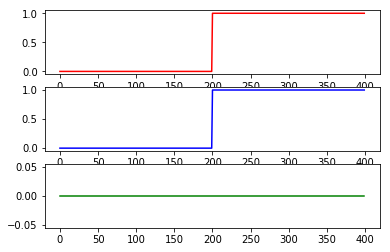

In [41]:
Y_pred = model.predict(X_test)

plt.subplot(3, 1, 1)
plt.plot(Y_test[:, 1], 'r')

plt.subplot(3, 1, 2)
plt.plot(Y_pred[:, 1], 'b')

plt.subplot(3, 1, 3)
plt.plot(Y_test[:, 1] - Y_pred[:, 1], 'g')

plt.show()

In [42]:
now = datetime.datetime.now()

# modelSaved = '{}-{}_{}_{}.h5'.format(folderNormal, folderFault, pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))

modelSaved = '{}-{}_{}_{}.h5'.format('Normal', 'B028', pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))
meanSaved = 'mean_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))
stdSaved = 'std_{}.npy'.format(now.strftime('%m-%d-%H:%M:%S'))

inputStr = input('''Save Model as '{}'? (y/n)\n'''.format(modelSaved))

if (inputStr == 'y' or inputStr == 'Y'):  
    model.save(savePath + '/{}'.format(modelSaved))
    np.save(savePath + '/{}'.format(meanSaved), trainMean)
    np.save(savePath + '/{}'.format(stdSaved), trainStd)

NameError: ignored